# Project Objective : Building an Regression model to predict the Homestay prices of Residential properties 

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.style

# Importing Data

In [3]:
df = pd.read_excel('Air_BNB.xlsx')

In [4]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [5]:
df.drop('id',axis=1, inplace=True)

In [6]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [8]:
round(df.describe(),2)

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price
count,74108.00,73908.00,74107.00,57389.00,74019.00,73980.00,74111.00
mean,3.16,1.24,0.73,94.07,1.27,1.71,4.78
std,2.15,0.58,0.44,7.84,0.85,1.25,0.72
min,1.00,0.00,0.00,20.00,0.00,0.00,0.00
25%,2.00,1.00,0.00,92.00,1.00,1.00,4.32
50%,2.00,1.00,1.00,96.00,1.00,1.00,4.71
75%,4.00,1.00,1.00,100.00,1.00,2.00,5.22
max,16.00,8.00,1.00,100.00,10.00,18.00,7.60


In [9]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [10]:
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107.0,NaN,NaN,NaN,0.73,0.44,0.0,0.0,1.0,1.0,1.0
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [11]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [12]:
df['room_type'].nunique()

3

In [13]:
df['room_type'].value_counts()

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),":",df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY : 3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE : 3

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [15]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [16]:
df_2 = df.copy()

In [17]:
df_2.shape

(74111, 10)

In [18]:
df_2.drop_duplicates(inplace=True)

In [19]:
df_2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [20]:
df_2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [21]:
df_2 = pd.get_dummies(df_2,columns=['room_type','cancellation_policy','instant_bookable'],dtype=float,drop_first=True)

In [22]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


## Null Values Treatment

In [23]:
df_2.isnull().sum()

accommodates                        3
bathrooms                         195
cleaning_fee                        4
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
instant_bookable_t                  0
dtype: int64

In [24]:
df_mean = df_2.copy()

In [25]:
for column in df_mean.columns:
    
    if df_mean[column].dtype != 'object':
        
        mean = df_mean[column].mean()
        
        df_mean[column] = df_mean[column].fillna(mean)

In [26]:
df_median = df_2.copy()

In [27]:
for column in df_median.columns:
    
    if df_median[column].dtype != 'object':
        
        median = df_median[column].median()
        
        df_median[column] = df_median[column].fillna(median)

In [28]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [29]:
df_median

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,95.0,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,95.0,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [30]:
df_knn = df_2.copy()

In [31]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_2)
df_knn = pd.DataFrame(data= df_imputed,columns=df_2.columns)

In [32]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.2,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54112,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
54113,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
54114,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
54115,2.0,1.0,1.0,96.6,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


## Handling Outliers

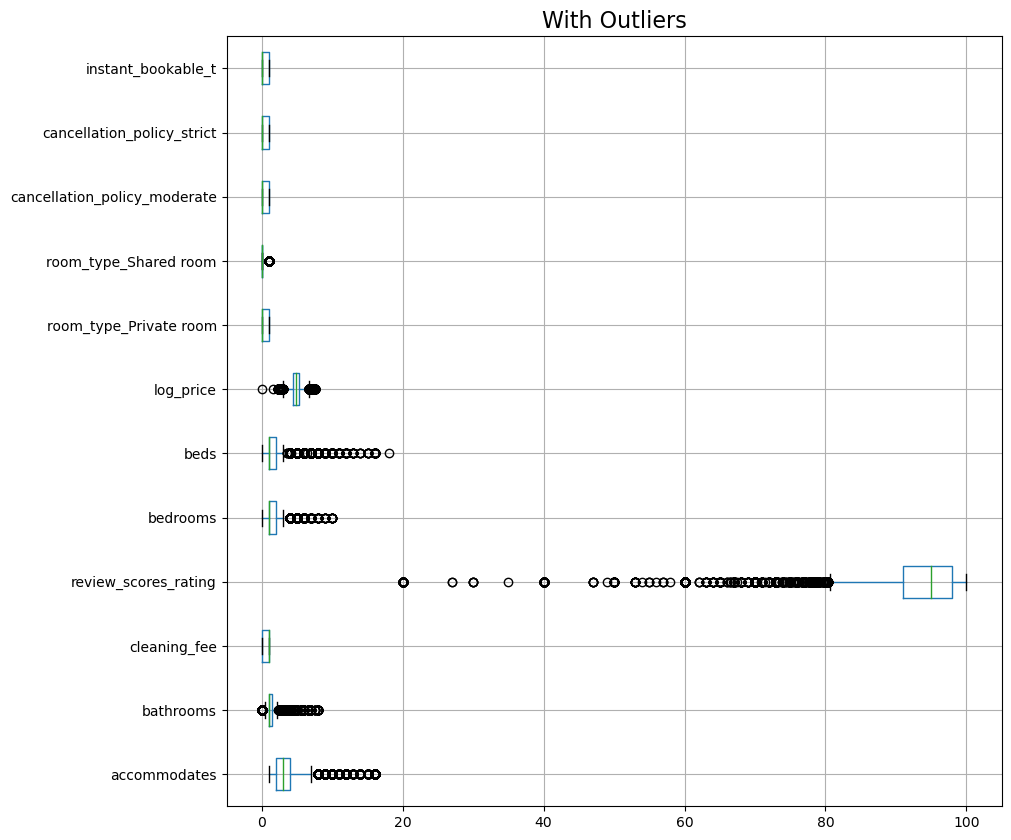

In [33]:
cont = df_knn.dtypes[(df_knn.dtypes !='uint8') & (df_knn.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert = 0)
plt.title('With Outliers',fontsize=16)
plt.show()


In [34]:
def remove_outlier(col):
    
    sorted(col)
    
    q1,q3 = np.percentile(col,[25,75])
    
    IQR = q3-q1
    
    lower_range = q1 - (1.5*IQR)
    
    upper_range = q3 + (1.5*IQR)
    
    return lower_range,upper_range

In [35]:
remove_outlier(df_mean['review_scores_rating'])

(83.0, 107.0)

In [36]:
df_mean_outlier = df_mean.copy()
df_median_outlier = df_median.copy()
df_knn_outlier = df_knn.copy()

In [37]:
for column in df_mean_outlier.columns:
    lr, ur = remove_outlier(df_mean_outlier[column])
    
    df_mean_outlier[column]=np.where(df_mean_outlier[column]>ur,ur,df_mean_outlier[column])
    
    df_mean_outlier[column]= np.where(df_mean_outlier[column]<lr,lr,df_mean_outlier[column])

In [38]:
for column in df_median_outlier.columns:
    lr, ur = remove_outlier(df_median_outlier[column])
    
    df_median_outlier[column]=np.where(df_median_outlier[column]>ur,ur,df_median_outlier[column])
    
    df_median_outlier[column]= np.where(df_median_outlier[column]<lr,lr,df_median_outlier[column])

In [39]:
for column in df_knn_outlier.columns:
    lr, ur = remove_outlier(df_knn_outlier[column])
    
    df_knn_outlier[column]=np.where(df_knn_outlier[column]>ur,ur,df_knn_outlier[column])
    
    df_knn_outlier[column]= np.where(df_knn_outlier[column]<lr,lr,df_knn_outlier[column])

## Data Distribution

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


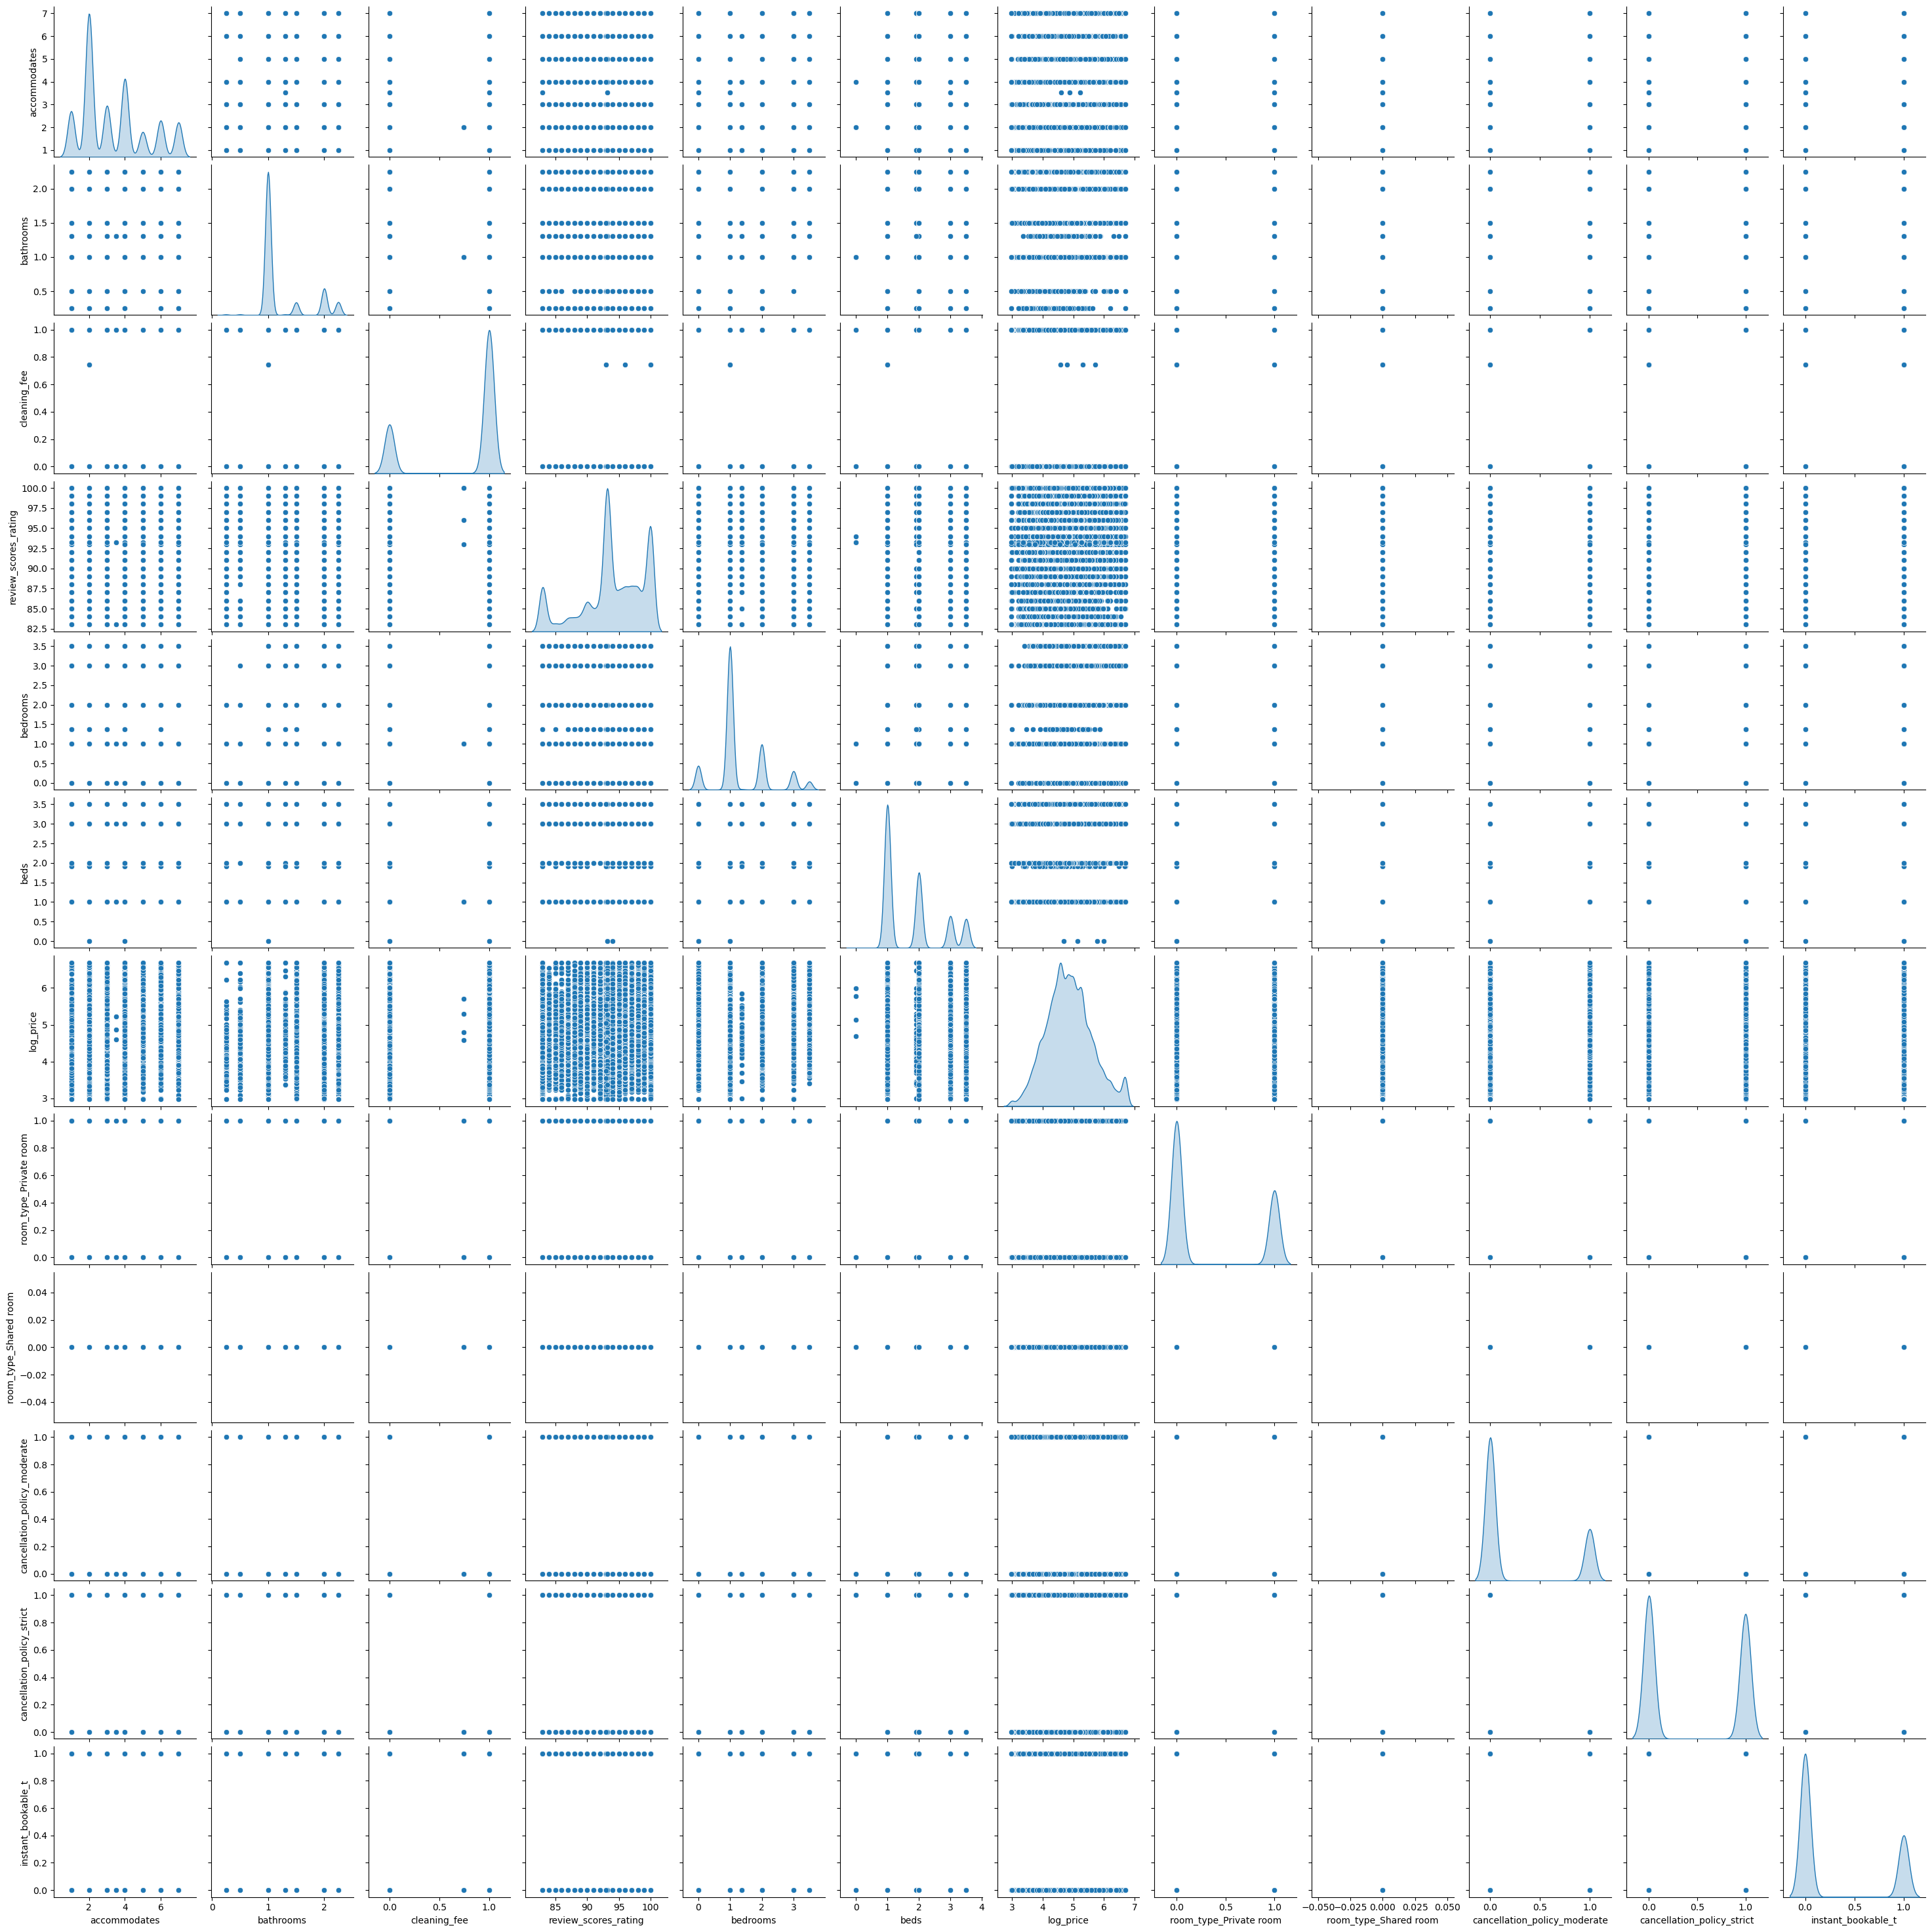

In [40]:
sns.pairplot(df_mean_outlier, diag_kind='kde')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

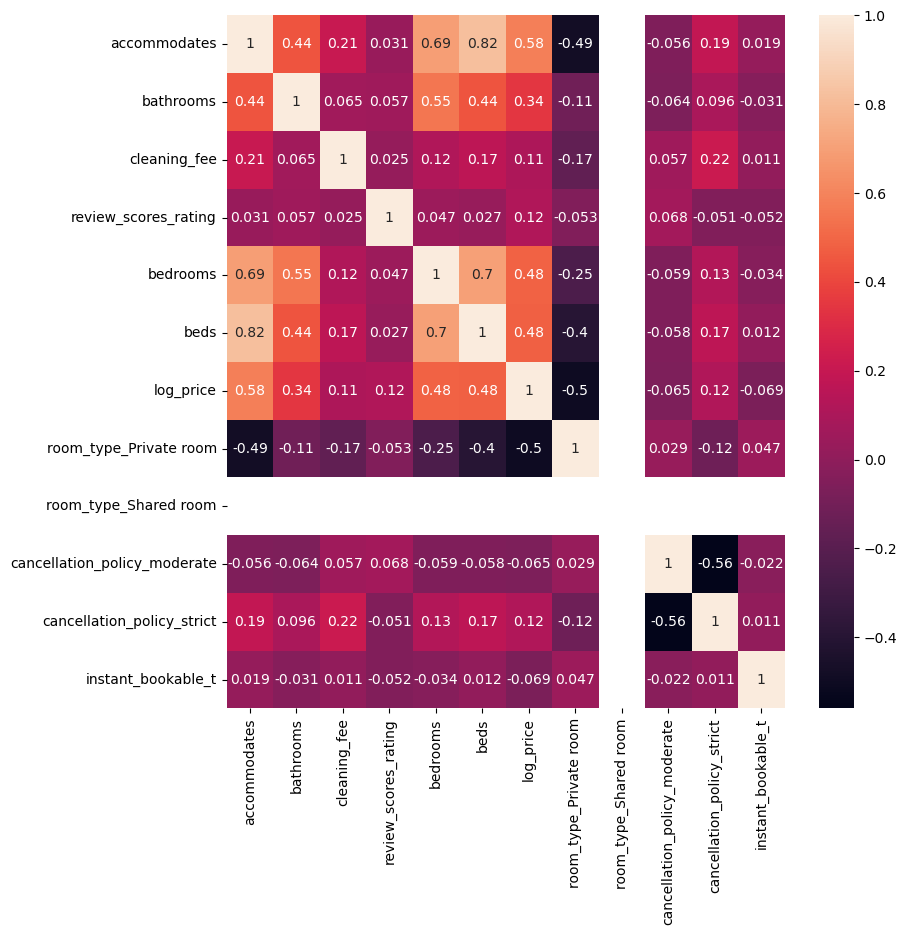

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(df_mean_outlier.corr(),annot=True)
plt.show

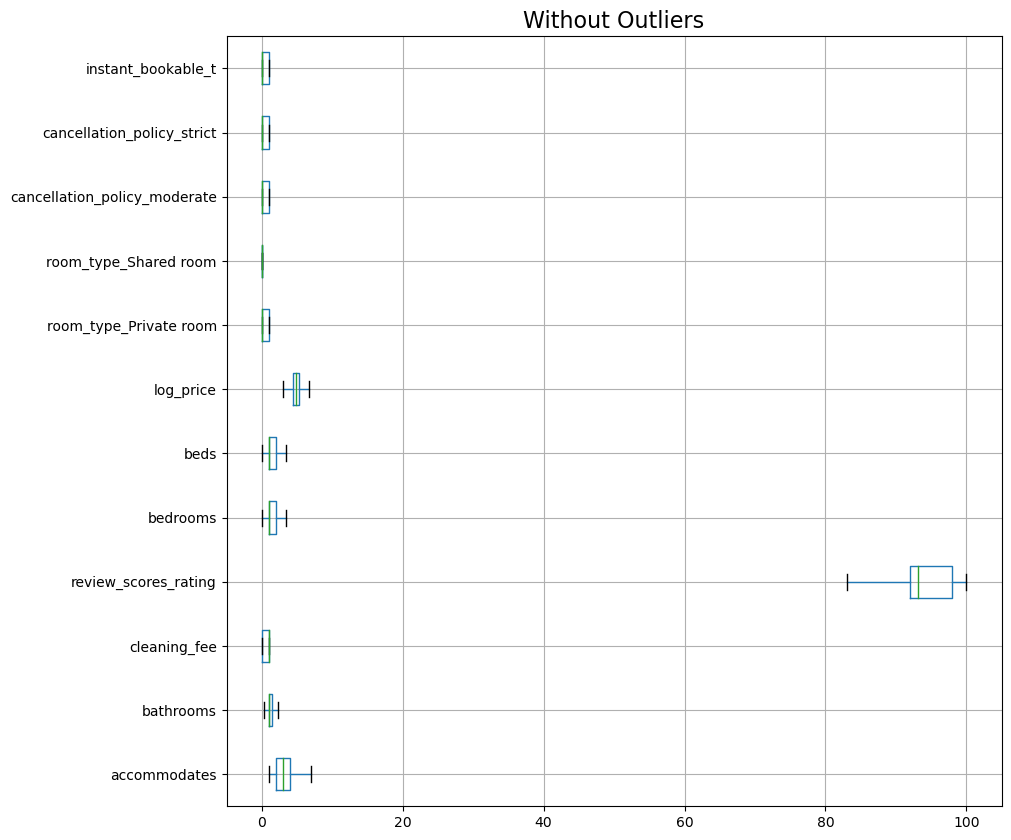

In [42]:
cont = df_mean_outlier.dtypes[(df_mean_outlier.dtypes !='uint8') & (df_mean_outlier.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_mean_outlier[cont].boxplot(vert = 0)
plt.title('Without Outliers',fontsize=16)
plt.show()

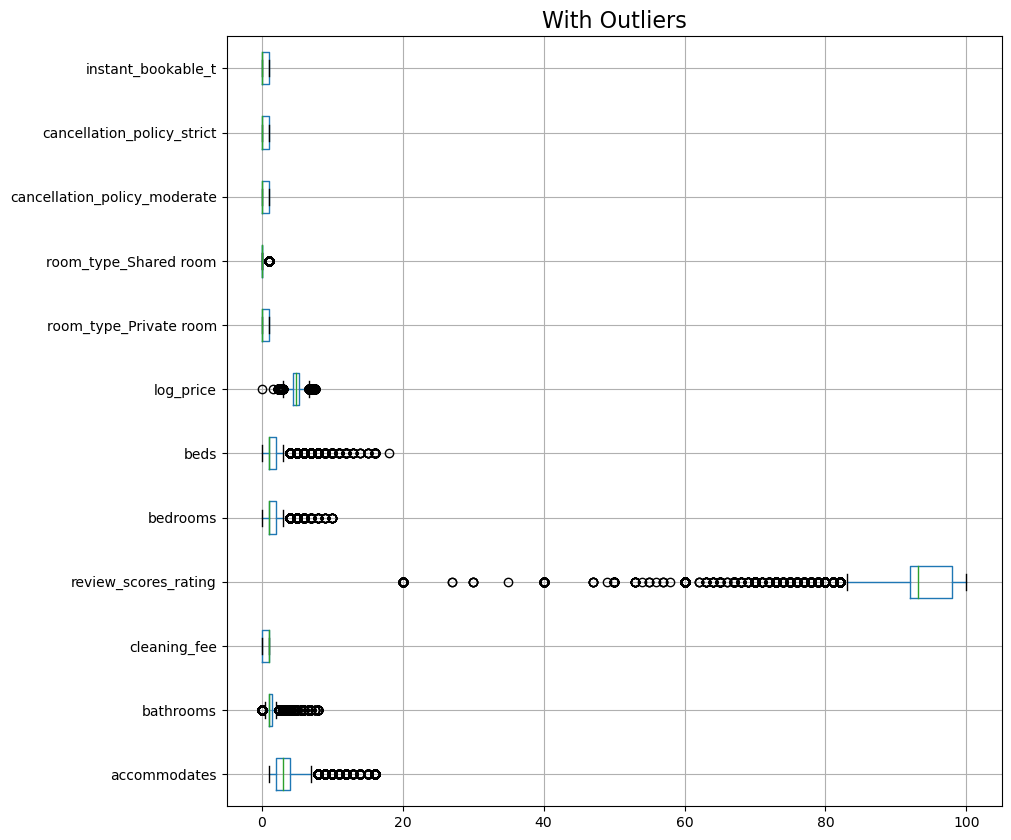

In [43]:
cont = df_mean.dtypes[(df_mean.dtypes !='uint8') & (df_mean.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert = 0)
plt.title('With Outliers',fontsize=16)
plt.show()

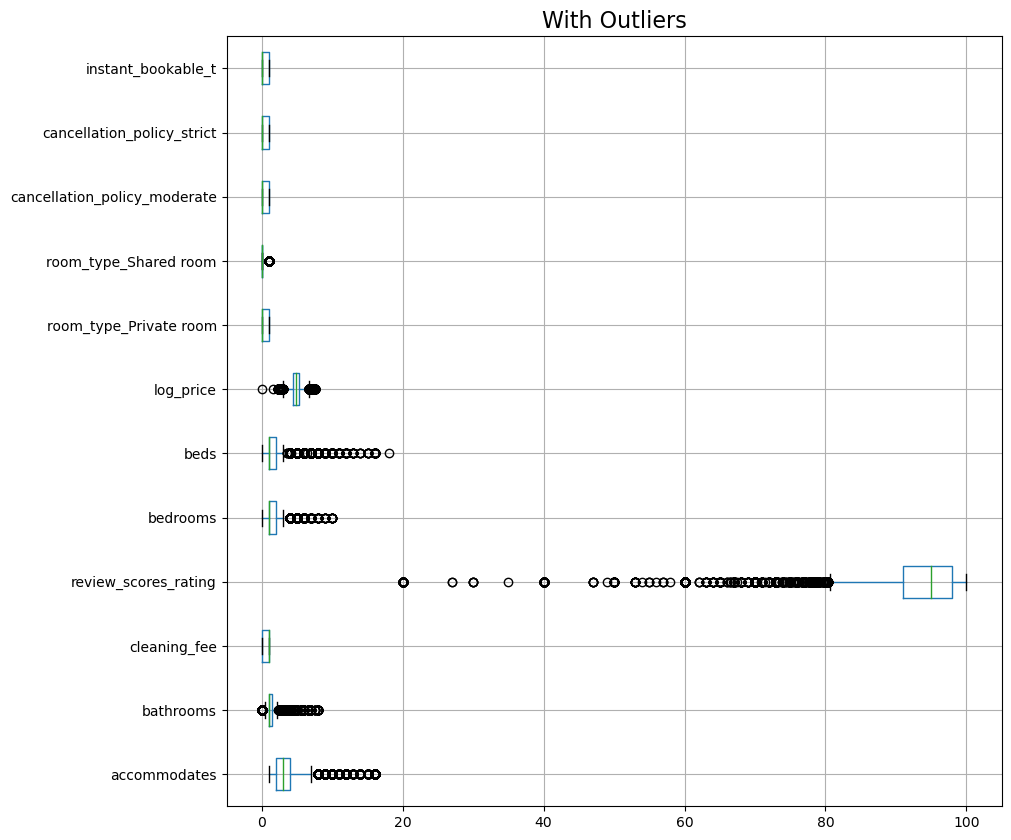

In [44]:
cont = df_knn.dtypes[(df_knn.dtypes !='uint8') & (df_knn.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert = 0)
plt.title('With Outliers',fontsize=16)
plt.show()

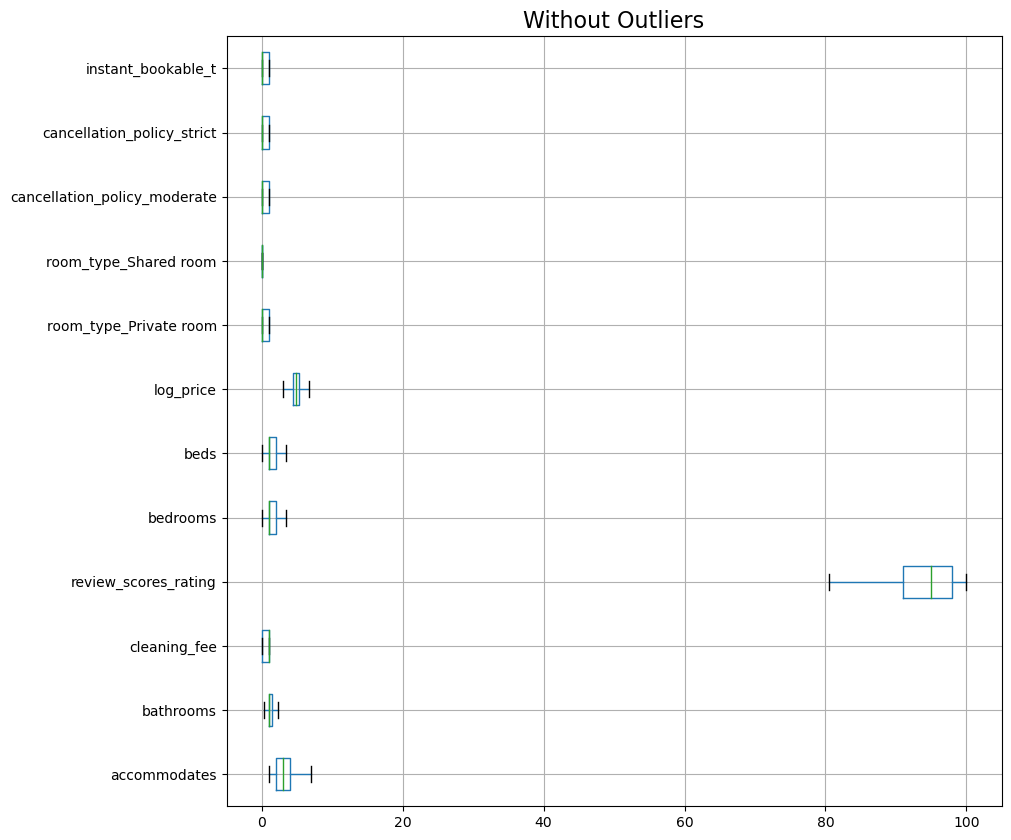

In [45]:
cont = df_knn_outlier.dtypes[(df_knn_outlier.dtypes !='uint8') & (df_knn_outlier.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_knn_outlier[cont].boxplot(vert = 0)
plt.title('Without Outliers',fontsize=16)
plt.show()

## Model Training

#### Mean - Outlier Treated

In [46]:
X = df_mean_outlier.drop('log_price', axis= 1)
y = df_mean_outlier['log_price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [48]:
regression_model = LinearRegression()

In [49]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [50]:
regression_model.score(X_train,y_train)

0.44534054044857874

#### Mean - Outlier Not Treated

In [51]:
X = df_mean.drop('log_price', axis= 1)
y = df_mean['log_price']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
regression_model = LinearRegression()

regression_model.fit(X_train,y_train)

LinearRegression()

In [54]:
regression_model.score(X_train,y_train)

0.5026453886994027

#### Median - Outlier Not Treated

In [55]:
X = df_median.drop('log_price', axis= 1)
y = df_median['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
regression_model = LinearRegression()

regression_model.fit(X_train,y_train)

LinearRegression()

In [57]:
regression_model.score(X_train,y_train)

0.5041739382604415

#### Median - Outlier Treated

In [58]:
X = df_median_outlier.drop('log_price', axis= 1)
y = df_median_outlier['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [59]:
regression_model = LinearRegression()

regression_model.fit(X_train,y_train)

LinearRegression()

In [60]:
regression_model.score(X_train,y_train)

0.4482835745841216

#### KNN - Outlier Treated

In [61]:
X = df_knn_outlier.drop('log_price', axis= 1)
y = df_knn_outlier['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.4508341542386193

In [62]:
#### KNN - Outlier Not Treated

In [63]:
X = df_knn.drop('log_price', axis= 1)
y = df_knn[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5053521305008037

In [64]:
X_train

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
25136,7.0,1.0,0.0,100.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
6288,1.0,2.0,0.0,99.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
36561,2.0,1.0,0.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2034,16.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21668,3.0,1.0,0.0,95.8,1.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
50057,2.0,1.0,1.0,90.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
32511,6.0,1.0,1.0,97.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0
5192,4.0,1.0,1.0,98.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0
12172,3.0,1.0,1.0,98.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [65]:
df_train = pd.concat([X_train, y_train],axis=1)
df_test = pd.concat([X_test, y_test],axis=1)

In [66]:
#df_train.rename(columns={'room_type_Shared room':'room_type_Shared_room', 'room_type_Private room':'room_type_Private_room'},inplace=True)

In [67]:
df_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,16.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,95.8,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.499810


In [68]:
#expr = 'accommodates + bathrooms + cleaning_fee + review_scores_rating + bedrooms + beds + room_type_Private_room + room_type_Shared_room + cancellation_policy_moderate + cancellation_policy_strict + instant_bookable_t ~ log_price'

In [69]:
""""import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data= df_train).fit()
lm1.params"""

'"import statsmodels.formula.api as smf\nlm1 = smf.ols(formula= expr, data= df_train).fit()\nlm1.params'

In [70]:
regression_model.coef_

array([[ 0.07466474,  0.15363281, -0.090419  ,  0.0076842 ,  0.15433854,
        -0.05022352, -0.64609607, -1.09476069, -0.06884858, -0.01359426,
        -0.05669521]])

In [71]:
X_train.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'instant_bookable_t'],
      dtype='object')

In [72]:
col_name = df_2['instant_bookable_t']

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The Coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
intercept = regression_model.intercept_[0]

print(" Intercept Of Our Model is {}".format(intercept))